In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [2]:
df = pd.read_csv('Deep/chap11/data/iris.csv')
df.info()
print('--------------------------------------')
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
--------------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...

In [3]:
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [30]:
from sklearn.model_selection import train_test_split
x, y = train_test_split(data, test_size=0.4, random_state=110)

In [31]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [33]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [34]:
print(x.size())
print(y.size())
print(x)

torch.Size([90, 8])
torch.Size([60, 8])
tensor([[ 5.8891e-01,  5.5333e-01,  5.6925e-01,  1.2745e+00,  1.7109e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.3510e+00, -5.3718e-01,  1.9577e+00, -1.3981e+00, -1.0500e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-3.8106e-01,  9.1684e-01, -3.5636e-01,  4.7843e-01,  1.3323e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [-1.3279e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.1815e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [ 1.3279e+00,  6.7450e-01, -5.8776e-01,  1.0471e+00,  1.3165e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 9.5842e-01,  7.9567e-01, -1.2496e-01,  9.9022e-01,  7.9059e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.

In [35]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters = num_clusters, distance='euclidean', device=device
)

running k-means on cpu..


[running kmeans]: 6it [00:00, 1200.09it/s, center_shift=0.000000, iteration=6, tol=0.000100]


In [36]:
print(cluster_ids_x)
print(cluster_centers)

tensor([0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2,
        1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 1,
        0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1,
        0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0])
tensor([[ 1.1663,  0.9842, -0.0607,  1.0487,  1.1229, -0.7071, -0.7071,  1.4142],
        [-0.0231,  0.2252, -0.4913,  0.2960,  0.2044, -0.7071,  1.4142, -0.7071],
        [-1.1786, -0.9855,  0.8238, -1.3090, -1.2692,  1.4142, -0.7071, -0.7071]])


In [37]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device = device
)

predicting on cpu..


In [38]:
print(cluster_ids_y)

tensor([0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2,
        2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2])


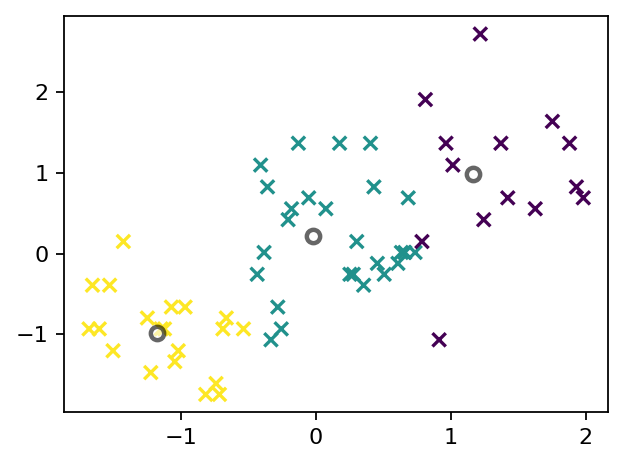

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3), dpi = 160)
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='viridis', marker='x')

plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)

plt.tight_layout()
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load('Deep\chap11\data\data.npy')

[[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]


[[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


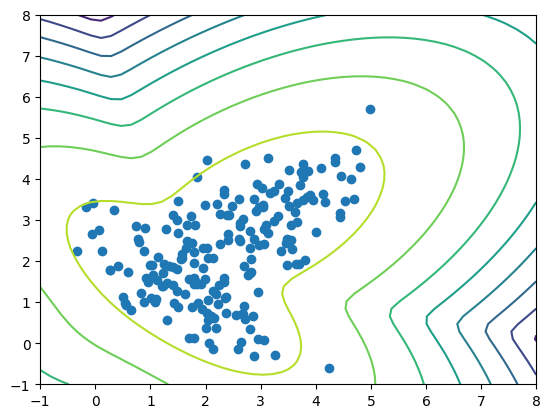

In [45]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1,8), np.linspace(-1, 8))
XX = np.array([X.ravel(), Y.ravel()]).T

Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()